<a href="https://colab.research.google.com/github/Yashwanth-Krishna-18/PCA-From-Scratch/blob/main/IITM_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sck
import math



DataSet

 d: No.of features or dimensions

 n : No.of data Points

In [ ]:
X=np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,2),(0,-3),(-1,-4)]).T

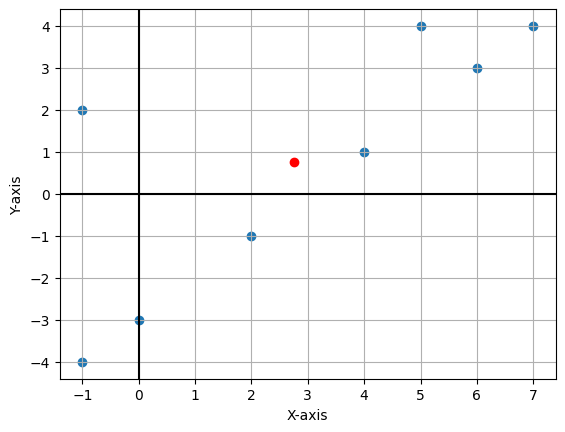

In [ ]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(y=0,color="black")
plt.axvline(x=0,color="black")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
X_mean=np.mean(X[0,:])
Y_mean=np.mean(X[1,:],)
plt.scatter(X_mean,Y_mean,color="r")
plt.grid()
plt.show()

Center The DataSet

In [ ]:
def center(X):
   X_mean=np.mean(X[0,:])
   Y_mean=np.mean(X[1,:])
   centers_x=np.array([ X[0,:]-X_mean,X[1,:]-Y_mean])
   return centers_x
value=center(X)
print(value)

[[ 1.25  2.25  3.25  4.25 -0.75 -3.75 -2.75 -3.75]
 [ 0.25  3.25  2.25  3.25 -1.75  1.25 -3.75 -4.75]]


Centered DataSet Graph

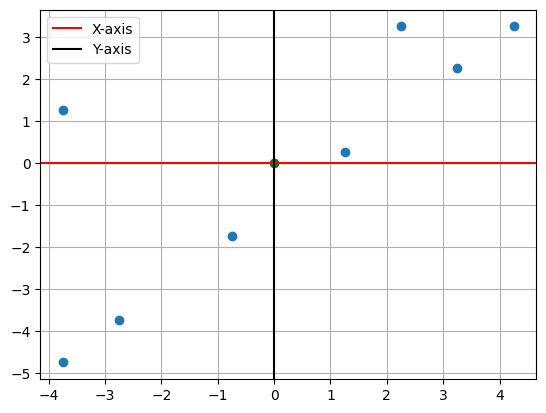

In [ ]:
plt.scatter(value[0,:],value[1,:])
X_mean=np.mean(value[0,:])
Y_mean=np.mean(value[1,:])
plt.scatter(X_mean,Y_mean,color="green")
plt.axhline(y=0,color="red",label="X-axis")
plt.axvline(x=0,color="black",label="Y-axis")
plt.legend()
plt.grid()
plt.show()

Covariance Matrix Calculation which is Set Of Features of n*n Matrix

In [ ]:
def covariance(value):
  ans=value@value.T/value.shape[1]
  return ans
cov=covariance(value)
print(cov)

[[8.9375 6.6875]
 [6.6875 8.4375]]


Eigen Values and Eigen Vectors Computation

In [ ]:
def eig_values_vectors(cov):
  eigen_values,eigen_vectors=np.linalg.eig(cov)
  sorted=np.argsort(eigen_values)[::-1]
  eigen_values=eigen_values[sorted]
  eigen_vectors=eigen_vectors[:,sorted]
  return eigen_values,eigen_vectors
eigen_values,eigen_vectors=eig_values_vectors(cov)
print("Eigen Values are",eigen_values)
print("Eigen vectors are",eigen_vectors)


Eigen Values are [15.37967127  1.99532873]
Eigen vectors are [[ 0.72019341 -0.69377335]
 [ 0.69377335  0.72019341]]


Find Top k Eigen values which captures 95% of Variance other principal components are just Residues/Noise

In [ ]:
w1 = eigen_vectors[:, 0].reshape(2, 1)  #  First eigenvector (reshape to (2,1))
w2 = eigen_vectors[:, 1].reshape(2, 1)  #  Second eigenvector (reshape to (2,1))
#  Step 2: Reconstruct Data
#print(w2)
reconstruct = (value.T @ w1) @ w1.T + (value.T @ w2) @ w2.T
print(reconstruct.T)

[[-0.69377335]
 [ 0.72019341]]
[[ 1.25  2.25  3.25  4.25 -0.75 -3.75 -2.75 -3.75]
 [ 0.25  3.25  2.25  3.25 -1.75  1.25 -3.75 -4.75]]


Reconstruction error calculation by all Components

In [ ]:
#The Reconstruction error for Component1 is
recons_error=np.mean((value-reconstruct.T)**2)
print(recons_error)

2.374671621429462e-31


Only using Principal Component 1

In [ ]:
reconstruct1=(value.T@w1)@w1.T
recons_error_1=(np.mean(value-reconstruct1.T)**2)
print(recons_error_1)

1.0833355937178202e-32


Only using Principal Component

In [ ]:
reconstruct2=(value.T@w2)@w2.T
recons_error_2=(np.mean(value-reconstruct2.T)**2)
print(recons_error_2)

0.0
